In [1]:
%reset -f

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]]

sFeatures = features


kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0,
               )

kmeans.fit(sFeatures)

inertia = kmeans.inertia_
print("Miara jakości=",inertia);

centroids = kmeans.cluster_centers_
print("Centroidy: \n",centroids)

Miara jakości= 36916.591472376465
Centroidy: 
 [[ 60.12765957 160.0212766 ]
 [ 54.38709677 134.21774194]
 [ 51.78787879 114.13131313]]


   wiek  cisnienie_krwi_spoczynek
0  70.0                     130.0
1  67.0                     115.0
2  57.0                     124.0
3  64.0                     128.0
4  74.0                     120.0


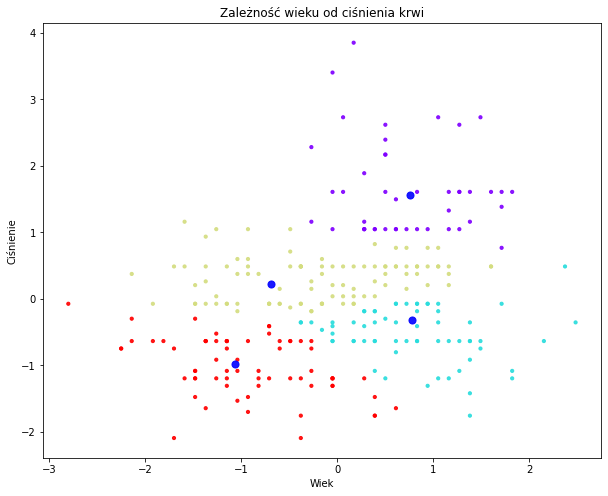

In [12]:
%reset -f

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


dataset = pd.read_csv('./dane/serce.csv')
features = dataset.iloc[:,[0,3]]

print(features.head())

scaler = StandardScaler ()
sFeatures = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=1000,random_state=0)
kmeans.fit(sFeatures)
centroidsKMeans = kmeans.cluster_centers_
centroidsKMeansX = centroidsKMeans[:,0]
centroidsKMeansY = centroidsKMeans[:,1]

clusters = kmeans.fit_predict(features)

x = sFeatures[:, 0]
y = sFeatures[:, 1]

plt.figure(figsize=(10, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter(x, y, s=10, c = clusters, alpha=0.9, cmap='rainbow')
plt.scatter(centroidsKMeansX, centroidsKMeansY, s=50,  color="blue", alpha=0.9)
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie")
plt.show()

In [5]:
%reset -f

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]]

sFeatures = features

kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0,
               )

kmeans.fit(sFeatures)

inertia = kmeans.inertia_
print("Miara jakości=",inertia);

centroids = kmeans.cluster_centers_
print("Centroidy: \n",centroids)

Miara jakości= 36916.97897003907
Centroidy: 
 [[ 60.12765957 160.0212766 ]
 [ 51.76530612 114.03061224]
 [ 54.384      134.136     ]]


In [4]:
%reset -f

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def myformat(number):
    return "{0:.4f}".format(float(number))

datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

noColumn = datasetTrain.shape[1]

features_train = datasetTrain.iloc[:,[0,3]]
features_test = datasetTest.iloc[:,[0,3]]

scaler = StandardScaler ()
sFeaturesTrain = scaler.fit_transform(features_train)
sFeaturesTest = scaler.fit_transform(features_test)

kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(sFeaturesTrain)

clusters = kmeans.fit_predict(sFeaturesTest)

for i in range(0,10):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))

[[ 1.0869595   0.02197286]
 [ 0.7286212  -1.0766703 ]
 [-0.46583979 -0.4174844 ]
 [ 0.37028291 -0.12451289]
 [ 1.56474389 -0.71045591]
 [-1.54085467 -1.44288468]
 [-0.58528588  0.75440164]
 [-0.46583979  0.75440164]
 [ 0.7286212   2.21925918]
 [-1.42140858  0.02197286]]
Obiekt numer:1  Skupienie:1
Obiekt numer:2  Skupienie:1
Obiekt numer:3  Skupienie:2
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:1
Obiekt numer:6  Skupienie:2
Obiekt numer:7  Skupienie:2
Obiekt numer:8  Skupienie:2
Obiekt numer:9  Skupienie:0
Obiekt numer:10  Skupienie:2


*** Eksperyment numer:1 Jakość= 540.0000000000005
*** Eksperyment numer:2 Jakość= 310.52299261785123
*** Eksperyment numer:3 Jakość= 209.45468353044467
*** Eksperyment numer:4 Jakość= 165.84178655513657
*** Eksperyment numer:5 Jakość= 135.3353687374184
*** Eksperyment numer:6 Jakość= 109.98125633201882
*** Eksperyment numer:7 Jakość= 94.43268625731334
*** Eksperyment numer:8 Jakość= 82.9960525299187
*** Eksperyment numer:9 Jakość= 71.87427801256624


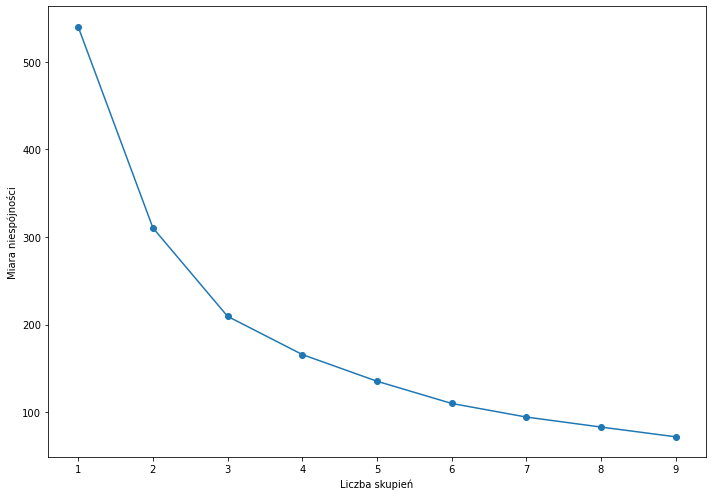

In [17]:
#Polecenie usuwa wszystkie zmienne z pamięci 
%reset -f 

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


dataset = pd.read_csv('./dane/serce.csv')
noColumn = dataset.shape[1]
features = dataset.iloc[:,[0,3]]

NO_EXPERIMENTS = 10

scaler = StandardScaler ()
sFeatures = scaler.fit_transform(features)

results = []
for k in range(1, NO_EXPERIMENTS):
        
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(sFeatures)
    
    inertia = kmeans.inertia_
    
    results.append(inertia)
    
    print("*** Eksperyment numer:"+str(k)+" Jakość=",inertia)

fig = plt.figure(figsize=(10, 7))
plt.plot(range(1,NO_EXPERIMENTS), results , marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Miara niespójności')
plt.tight_layout()
plt.show()

Liczebność skupien:
1    2180
2     922
0     231
Name: count, dtype: int64

Charakterystyka skupień (REZYGN):
REZYGN     0    1
0        130  101
1       1878  302
2        842   80


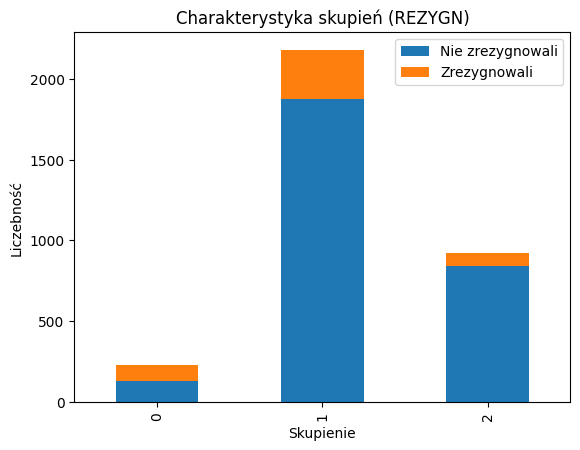

Klasyfikacja 5 ostatnich obiektów:
Obiekt 3329 należy do skupienia 2
Obiekt 3330 należy do skupienia 1
Obiekt 3331 należy do skupienia 1
Obiekt 3332 należy do skupienia 0
Obiekt 3333 należy do skupienia 2

Klasyfikacja nowego klienta:
Nowy klient należy do skupienia 0


In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./dane/rezygnacje.csv")
x = data[["PLAN_MIEDZY", "POCZTA_G"]]

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(x)

clusters_count = pd.Series(kmeans.labels_).value_counts()
print("Liczebność skupien:")
print(clusters_count)

rezygn_counts = data.groupby(kmeans.labels_)['REZYGN'].value_counts().unstack().fillna(0)
print("\nCharakterystyka skupień (REZYGN):")
print(rezygn_counts)
rezygn_counts.plot(kind='bar', stacked=True)
plt.xlabel('Skupienie')
plt.ylabel('Liczebność')
plt.title('Charakterystyka skupień (REZYGN)')
plt.legend(['Nie zrezygnowali', 'Zrezygnowali'])
plt.show()

last_five_predictions = kmeans.predict(x.tail(5))
print("Klasyfikacja 5 ostatnich obiektów:")
for i, cluster in enumerate(last_five_predictions):
    print(f"Obiekt {len(data) + i - 4} należy do skupienia {cluster}")

custom_customer = pd.DataFrame({'PLAN_MIEDZY': [1], 'POCZTA_G': [0]})
customer_prediction = kmeans.predict(custom_customer)
print()
print("Klasyfikacja nowego klienta:")
print("Nowy klient należy do skupienia",  customer_prediction[0])

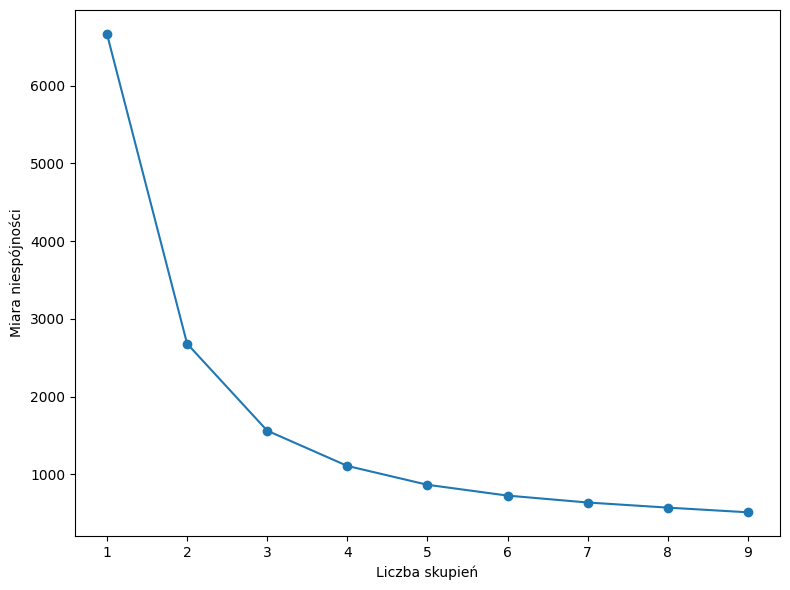

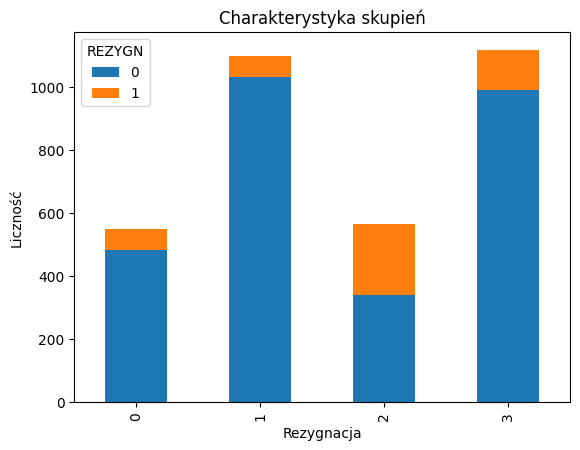

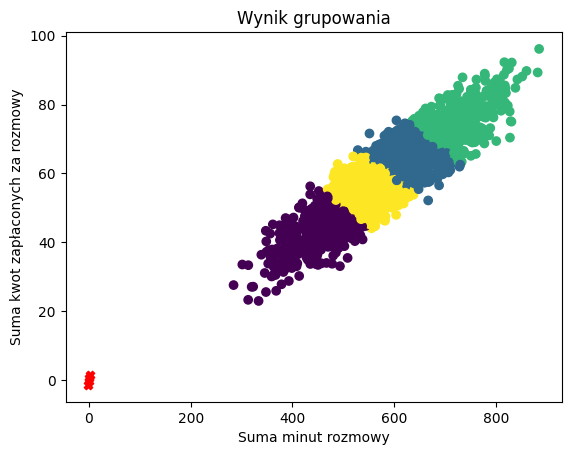

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./dane/rezygnacje.csv")
x = data[["PLAN_MIEDZY", "POCZTA_G"]]

data['SUMA_MINUT'] = data['DZIEN_MIN'] + data['WIECZOR_MIN'] + data['NOC_MIN'] + data['MIEDZY_MIN']
data['SUMA_KWOT'] = data['DZIEN_OPLATA'] + data['WIECZ_OPLATA'] + data['NOC_OPLATA'] + data['MIEDZY_OPLATA']

new_data = data[['SUMA_MINUT', 'SUMA_KWOT', 'REZYGN']]

NO_EXPERIMENTS = 10

scaler = StandardScaler ()
s_new_data = scaler.fit_transform(new_data[['SUMA_MINUT', 'SUMA_KWOT']])

results = []
for k in range(1, NO_EXPERIMENTS):

    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=300)
    kmeans.fit(s_new_data)

    inertia = kmeans.inertia_

    results.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(range(1,NO_EXPERIMENTS), results , marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Miara niespójności')
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=4,n_init=10,max_iter=300)
kmeans.fit(s_new_data)

labels = kmeans.labels_
characteristics = new_data.groupby(labels)['REZYGN'].value_counts().unstack().fillna(0)

characteristics.plot(kind='bar', stacked=True)
plt.xlabel('Rezygnacja')
plt.ylabel('Liczność')
plt.title('Charakterystyka skupień')
plt.show()

centers = kmeans.cluster_centers_
plt.scatter(new_data['SUMA_MINUT'], new_data['SUMA_KWOT'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.xlabel('Suma minut rozmowy')
plt.ylabel('Suma kwot zapłaconych za rozmowy')
plt.title('Wynik grupowania')
plt.show()

In [18]:
%reset -f

import pandas as pd
from sklearn.cluster import AgglomerativeClustering

datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

featuresTrain = datasetTrain.iloc[:,[0,3]]   #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          
featuresTest = datasetTest.iloc[:,[0,3]]     #Wiek i cisnienie krwi (tylko dwa atrybuty do grupowania)          

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
ac.fit(featuresTrain)

clusters = ac.fit_predict(featuresTest)

for i in range(0,len(clusters)):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))


Obiekt numer:1  Skupienie:1
Obiekt numer:2  Skupienie:1
Obiekt numer:3  Skupienie:0
Obiekt numer:4  Skupienie:1
Obiekt numer:5  Skupienie:1
Obiekt numer:6  Skupienie:2
Obiekt numer:7  Skupienie:0
Obiekt numer:8  Skupienie:0
Obiekt numer:9  Skupienie:3
Obiekt numer:10  Skupienie:0


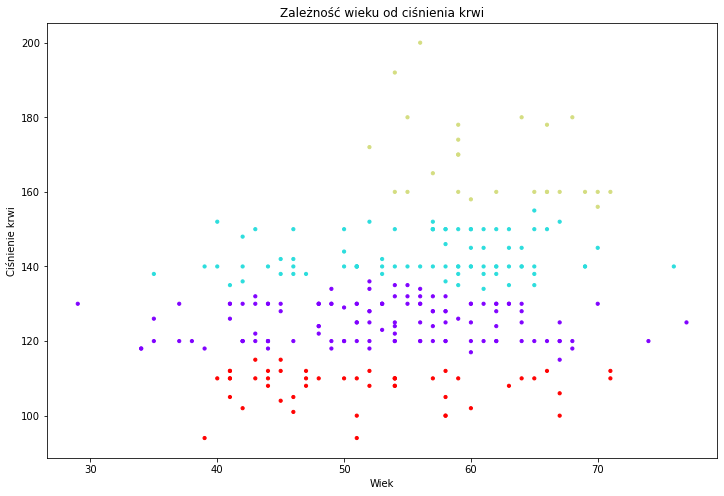

In [19]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]]

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
ac.fit(features)

clusters = ac.fit_predict(features)

x = np.ravel(features.iloc[:,[0]])
y = np.ravel(features.iloc[:,[1]])

plt.figure(figsize=(12, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter (x, y, c = clusters, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie krwi")
plt.show()


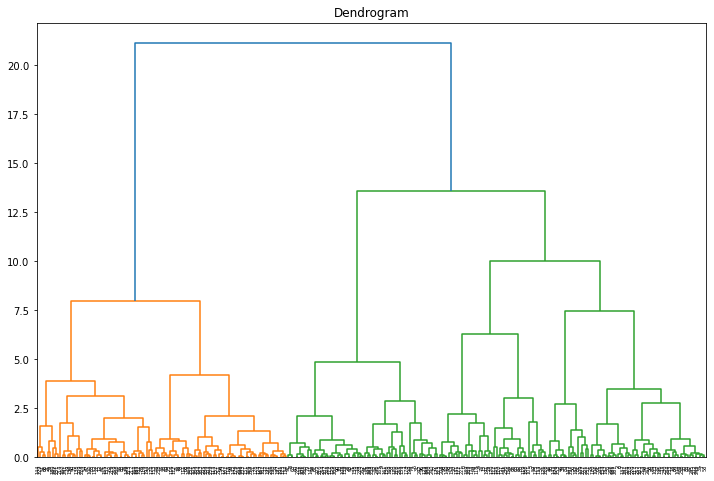

In [21]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]
featuresNS = dataset.iloc[:,[0,7]]

scaler = StandardScaler ()
features = scaler.fit_transform(featuresNS)

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
ac.fit(features)

plt.figure(figsize=(12, 8))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(features, method='ward'))
plt.show()

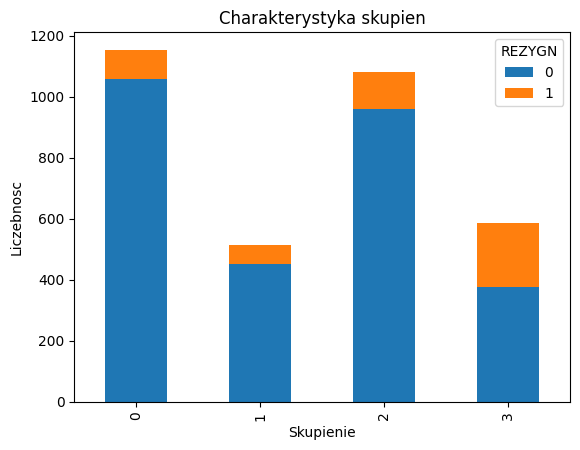

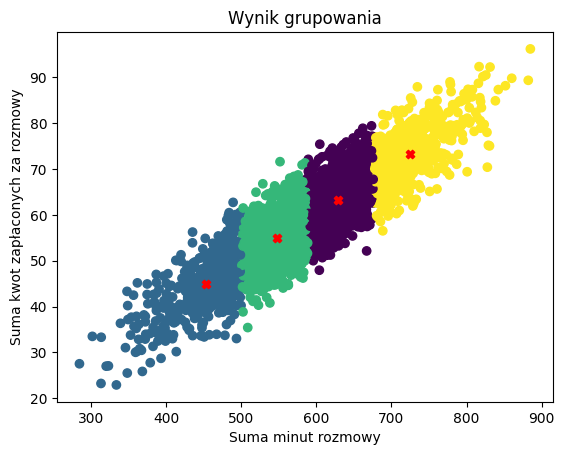

In [21]:
%reset -f

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("./dane/rezygnacje.csv")
x = data[["PLAN_MIEDZY", "POCZTA_G"]]

data['SUMA_MINUT'] = data['DZIEN_MIN'] + data['WIECZOR_MIN'] + data['NOC_MIN'] + data['MIEDZY_MIN']
data['SUMA_KWOT'] = data['DZIEN_OPLATA'] + data['WIECZ_OPLATA'] + data['NOC_OPLATA'] + data['MIEDZY_OPLATA']

new_data = data[['SUMA_MINUT', 'SUMA_KWOT', 'REZYGN']]

kmeans = KMeans(n_clusters=4, n_init=10,max_iter=300)
kmeans.fit(new_data)
characteristics = new_data.groupby(kmeans.labels_)["REZYGN"].value_counts().unstack().fillna(0)

characteristics.plot(kind='bar', stacked=True)
plt.xlabel("Skupienie")
plt.ylabel("Liczebnosc")
plt.title("Charakterystyka skupien")
plt.show()

labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(new_data['SUMA_MINUT'], new_data['SUMA_KWOT'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.xlabel('Suma minut rozmowy')
plt.ylabel('Suma kwot zapłaconych za rozmowy')
plt.title('Wynik grupowania')
plt.show()

In [ ]:
%reset -f

import pandas as pd
from sklearn.cluster import DBSCAN

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,7]]

db = DBSCAN(eps=7, min_samples=1, metric='euclidean')

db.fit(features)

labels = db.labels_
print(labels)

clusters = db.fit_predict(features)

for i in range(0,len(clusters)):
    print("Obiekt numer:"+str(i+1)," Skupienie:"+str(clusters[i]))

Etykiety grup dla obiektów: [-1 -1  0  0 -1  0  0  4  1  2  1  1  3 -1  0 -1  3  1 -1 -1  0  0 -1  4
  0  0  3  0  4 -1  0  5  6 -1 -1  0  1 -1  0  0 -1 -1  0 -1  0  1  0  4
  5  2 -1  0  1  1  0 -1  1  0 -1  0  2  0  0  2 -1  2  1  0  0  4  0  0
 -1 -1 -1  3 -1 -1  0  0 -1  6  2  0  4 -1  0 -1 -1 -1  1  0  0  4  0  4
  0 -1  1  0  4  0  0 -1  0  0 -1  2  1  4 -1  4 -1  0  0  0  0 -1  2  0
  0  0  2  5  0 -1  0  0  0  0 -1 -1  3  0  2  3  2  0  6  0 -1  1  1  0
 -1  0  4  4  0  4  4  0  4  0  0 -1  1  0  0 -1  6  2  0  0  4 -1  4  0
  3  1  5 -1 -1  0  6  1  1 -1 -1  0  0  0  4 -1  0  0  0  4  1  5  1 -1
  4 -1  0  0 -1  4 -1 -1  0  0  0  1 -1  2 -1 -1  0 -1 -1  0  0  0 -1  0
 -1 -1  0  0  4  1  2  0 -1 -1  0  0  2  0 -1 -1  4  0  0  5  1  0  3  0
 -1 -1  0  1  1  0 -1 -1  1 -1  0  0  4  4  2  5  2  0  1 -1  0  0  0  0
  4 -1  0  1  1  5]


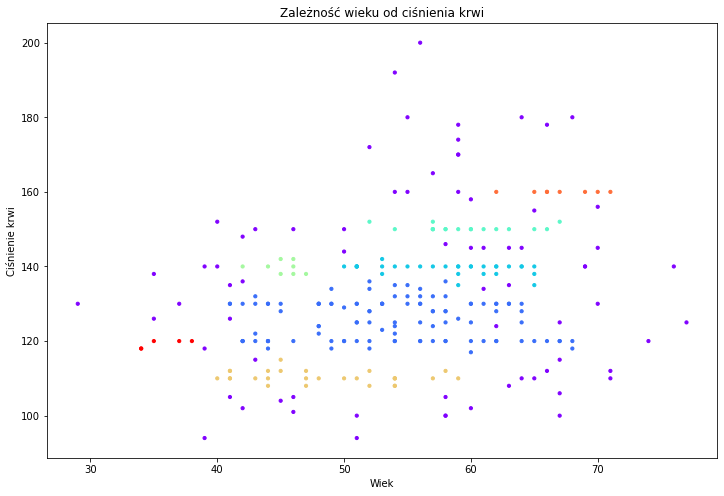

In [22]:
%reset -f

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

features = dataset.iloc[:,[0,3]]

db = DBSCAN(eps=3, min_samples=5, metric='euclidean')
db.fit(features)

labels = db.labels_
print("Etykiety grup dla obiektów:",labels)

clusters = db.fit_predict(features)

x = np.ravel(features.iloc[:,[0]])
y = np.ravel(features.iloc[:,[1]])

plt.figure(figsize=(12, 8))
plt.title('Zależność wieku od ciśnienia krwi')
plt.scatter (x, y, c = clusters, s=10, alpha=0.99, cmap='rainbow')
plt.xlabel("Wiek")
plt.ylabel("Ciśnienie krwi")
plt.show()

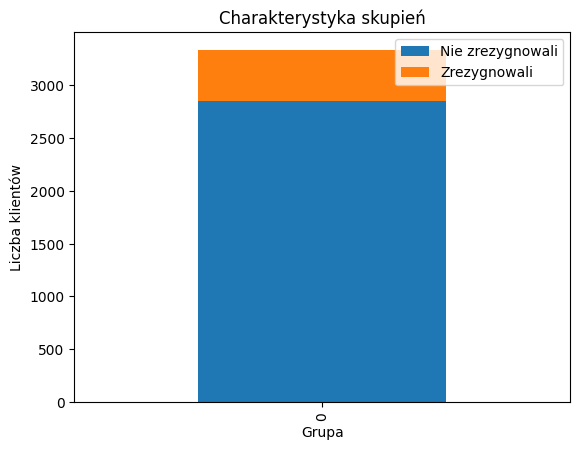

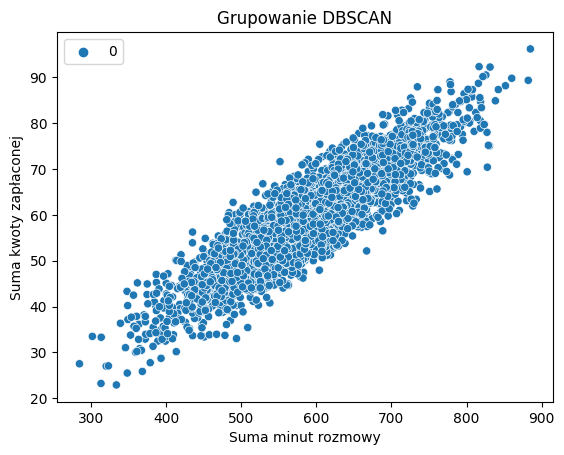

In [39]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

data = pd.read_csv("./dane/rezygnacje.csv")
x = data[["PLAN_MIEDZY", "POCZTA_G"]]

data['SUMA_MINUT'] = data['DZIEN_MIN'] + data['WIECZOR_MIN'] + data['NOC_MIN'] + data['MIEDZY_MIN']
data['SUMA_KWOT'] = data['DZIEN_OPLATA'] + data['WIECZ_OPLATA'] + data['NOC_OPLATA'] + data['MIEDZY_OPLATA']

new_data = data[['SUMA_MINUT', 'SUMA_KWOT', 'REZYGN']]

X = new_data[['SUMA_MINUT', 'SUMA_KWOT']]
eps = 1000
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples)
group = clustering.fit_predict(X)

group_characteristics = new_data.groupby([group, 'REZYGN']).size().unstack(fill_value=0)
group_characteristics.plot(kind='bar', stacked=True)
plt.xlabel('Grupa')
plt.ylabel('Liczba klientów')
plt.title('Charakterystyka skupień')
plt.legend(['Nie zrezygnowali', 'Zrezygnowali'])
plt.show()

sns.scatterplot(x='SUMA_MINUT', y='SUMA_KWOT', hue=group, data=new_data)
plt.xlabel('Suma minut rozmowy')
plt.ylabel('Suma kwoty zapłaconej')
plt.title('Grupowanie DBSCAN')
plt.show()